<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # add color channel
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_train, x_test = x_train/255.0, x_test/255.0
label_train, label_test = to_categorical(y_train), to_categorical(y_test) # one-hot encoding

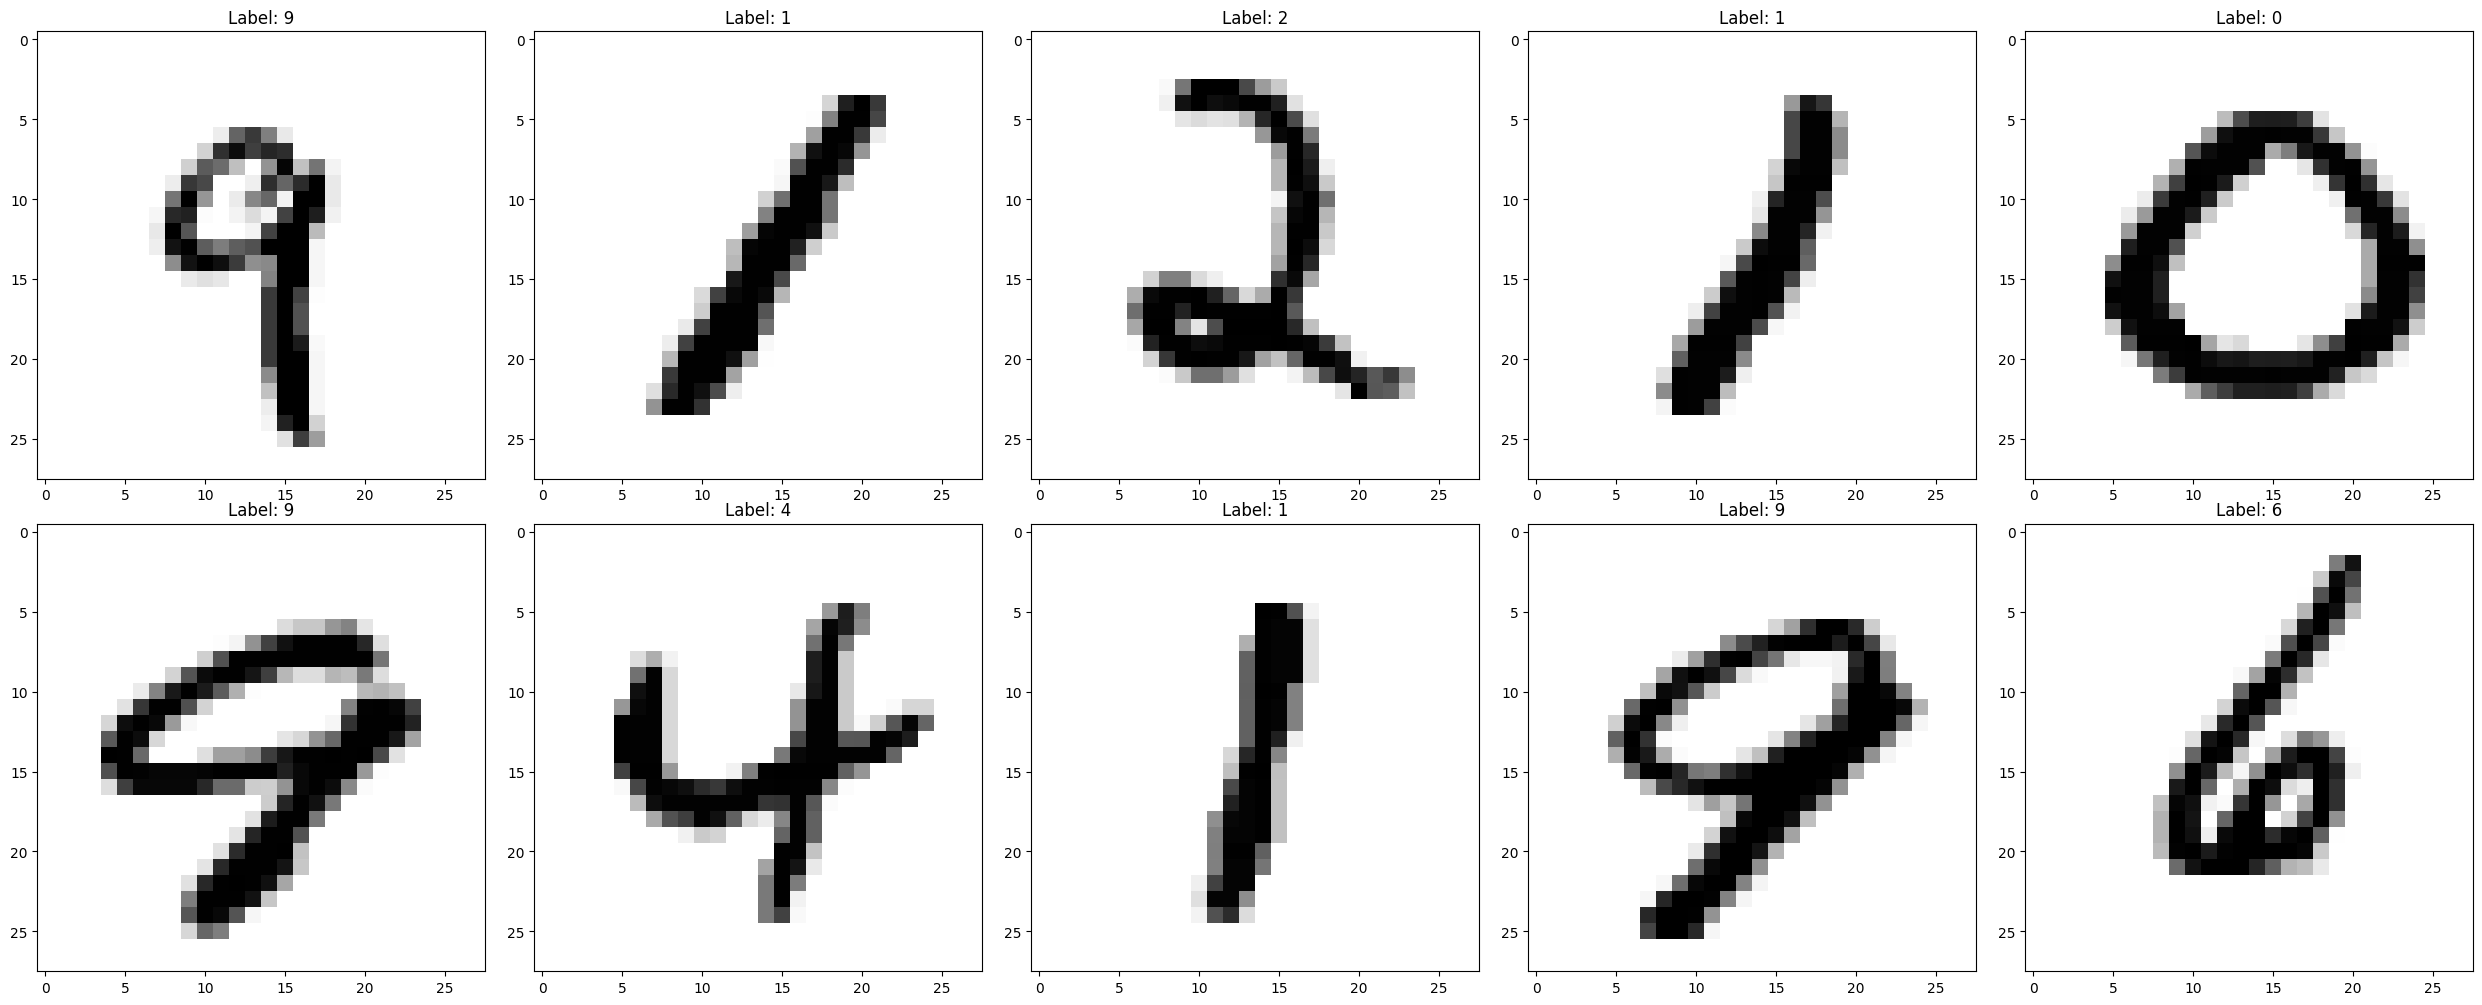

In [11]:
num_row, num_col = 2, 5

idx = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,)) # subset 10 figures
x_train10, y_train10 = x_train[idx], y_train[idx]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(25, 10))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train10[i])))
    ax.imshow(x_train10[i], cmap=cm.binary)

plt.tight_layout()
plt.show()

In [12]:
mnist_cnn = models.Sequential()
mnist_cnn.add(Conv2D(filters = 7, kernel_size = (4,4),padding = 'Same', activation ='relu', input_shape = (28,28,1))) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4))) # pooling
mnist_cnn.add(Conv2D(filters = 14, kernel_size = (4,4),padding = 'Same', activation ='relu')) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4), strides=(2,2)))
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# compile model
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
# train model
y_pred = mnist_cnn.fit(x_train, label_train, epochs = 10, batch_size = 250, validation_data=(x_test, label_test))

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.1698 - loss: 2.2923 - val_accuracy: 0.2802 - val_loss: 2.2454
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.3448 - loss: 2.2018 - val_accuracy: 0.5901 - val_loss: 1.8215
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.6249 - loss: 1.5339 - val_accuracy: 0.7599 - val_loss: 0.8191
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.7658 - loss: 0.7621 - val_accuracy: 0.8434 - val_loss: 0.5207
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.8380 - loss: 0.5227 - val_accuracy: 0.8671 - val_loss: 0.4249
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.8748 - loss: 0.4077 - val_accuracy: 0.9025 - val_loss: 0.3316
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.8987 - loss: 0.3305 - val_accuracy: 0.9070 - val_loss: 0.2977
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.9132 - loss: 0.2837 

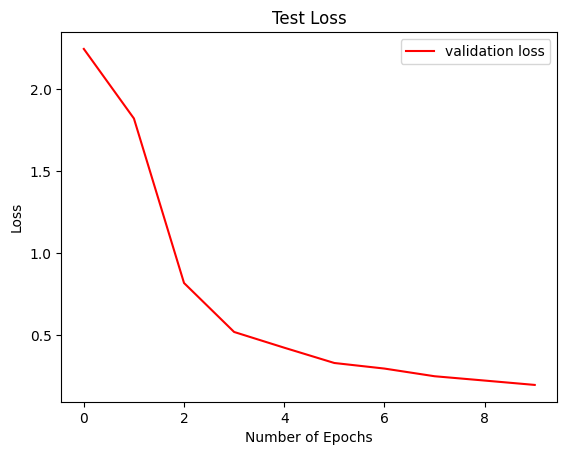

In [15]:
plt.plot(y_pred.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()